In [3]:




import seaborn as sns
import mpl_toolkits
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta,date
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.metrics import r2_score,mean_squared_error




In [4]:
data = pd.read_csv("CC GENERAL.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
print("Data Types:",data.dtypes)

Data Types: CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [9]:
data.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# CLUSTER PREPROCESSING

In [11]:
data = data.drop('CUST_ID', axis = 1)

In [12]:
np.nan in [np.nan] is True

False

In [13]:
data['CREDIT_LIMIT'].nunique()

205

In [14]:
data['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [15]:
print(data['CREDIT_LIMIT'])

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64


In [16]:
data['CREDIT_LIMIT'].unique

<bound method Series.unique of 0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64>

In [17]:
data['MINIMUM_PAYMENTS'].nunique()

8636

In [18]:
data['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [19]:
print(data['MINIMUM_PAYMENTS'])

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64


In [20]:
data.notna()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8946,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
8947,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8948,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [21]:
data.shape

(8950, 17)

In [22]:
data.isnull().any()


BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [23]:
print("column number containing null values")
print(len(data.columns[data.isna().any()]))


print("column number containing null values")
print(len(data.columns[data.notna().all()]))

print("Total columns in the dataframe")
print(len(data.columns))


column number containing null values
2
column number containing null values
15
Total columns in the dataframe
17


In [24]:
data.isna().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
data['MINIMUM_PAYMENTS'].unique


<bound method Series.unique of 0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64>

In [26]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [27]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace = True)

In [28]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace = True)

In [29]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

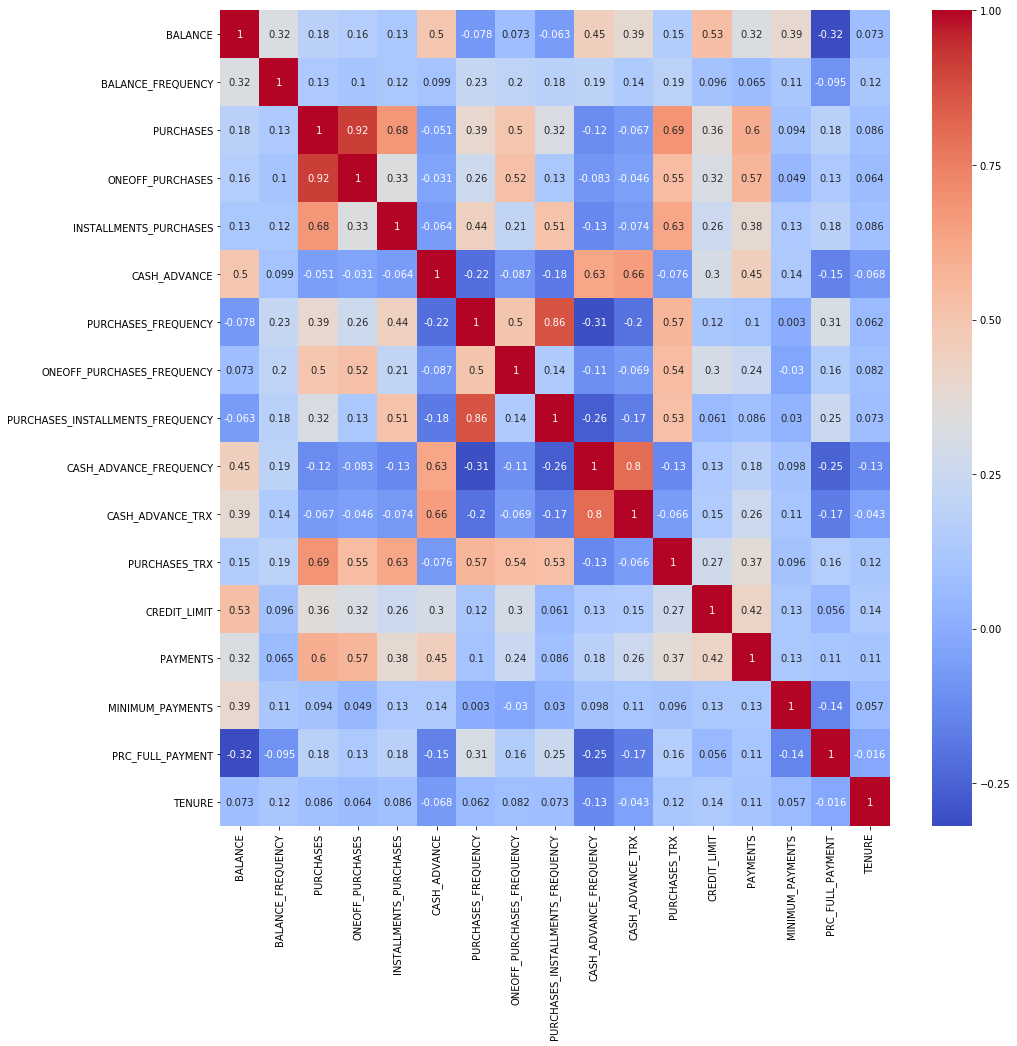

In [31]:
#CORRELATION VIZ
plt.figure(figsize = (15, 15))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

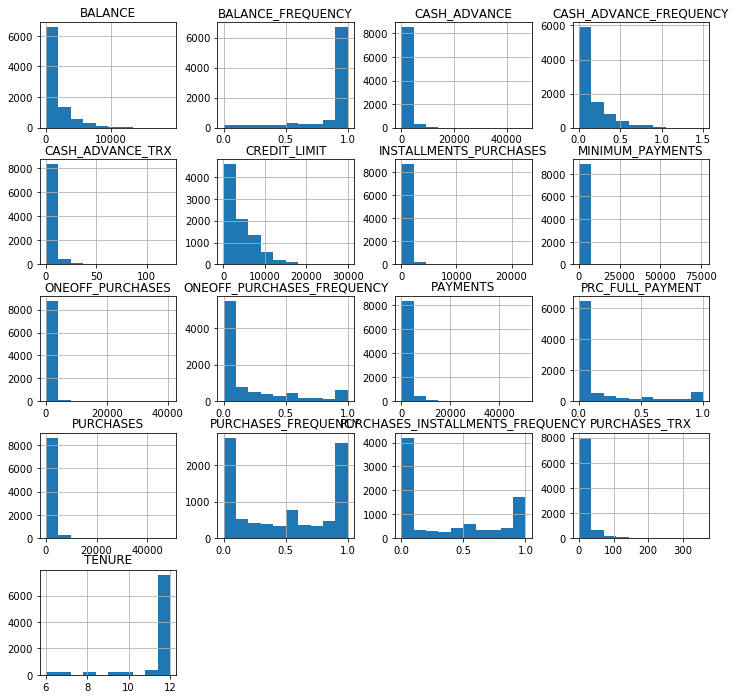

In [49]:
# analyzing data
data.hist(figsize=(12,12));

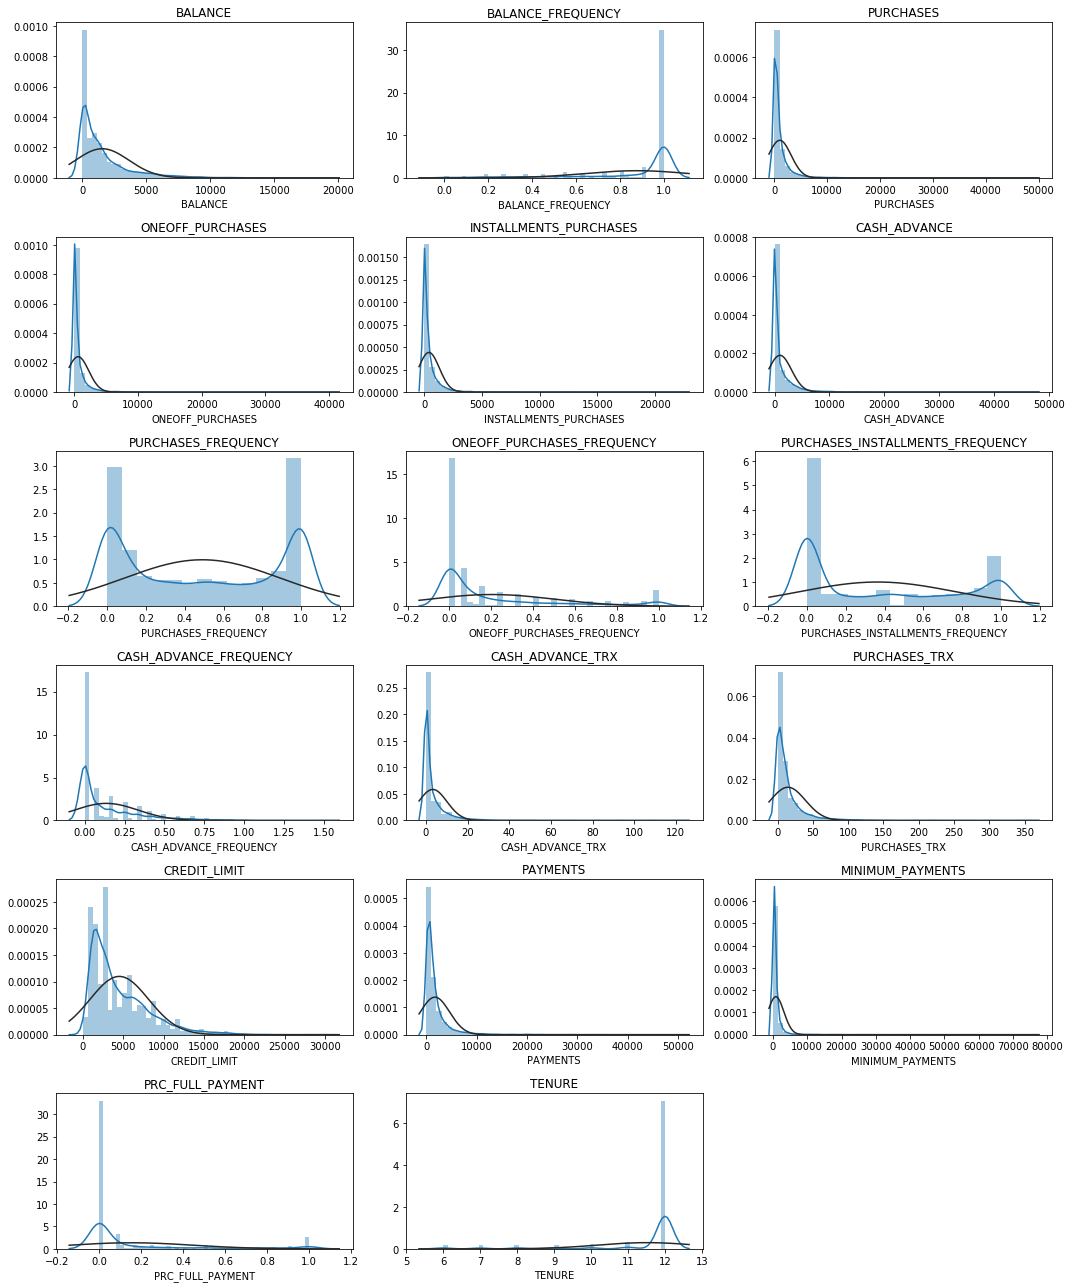

In [34]:
# a look to variables

from scipy.stats import norm 

variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES',
                      'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 
                      'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
                      'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(data[variables[i]].dropna(),fit=norm)
    plt.title(variables[i])

plt.tight_layout()

    

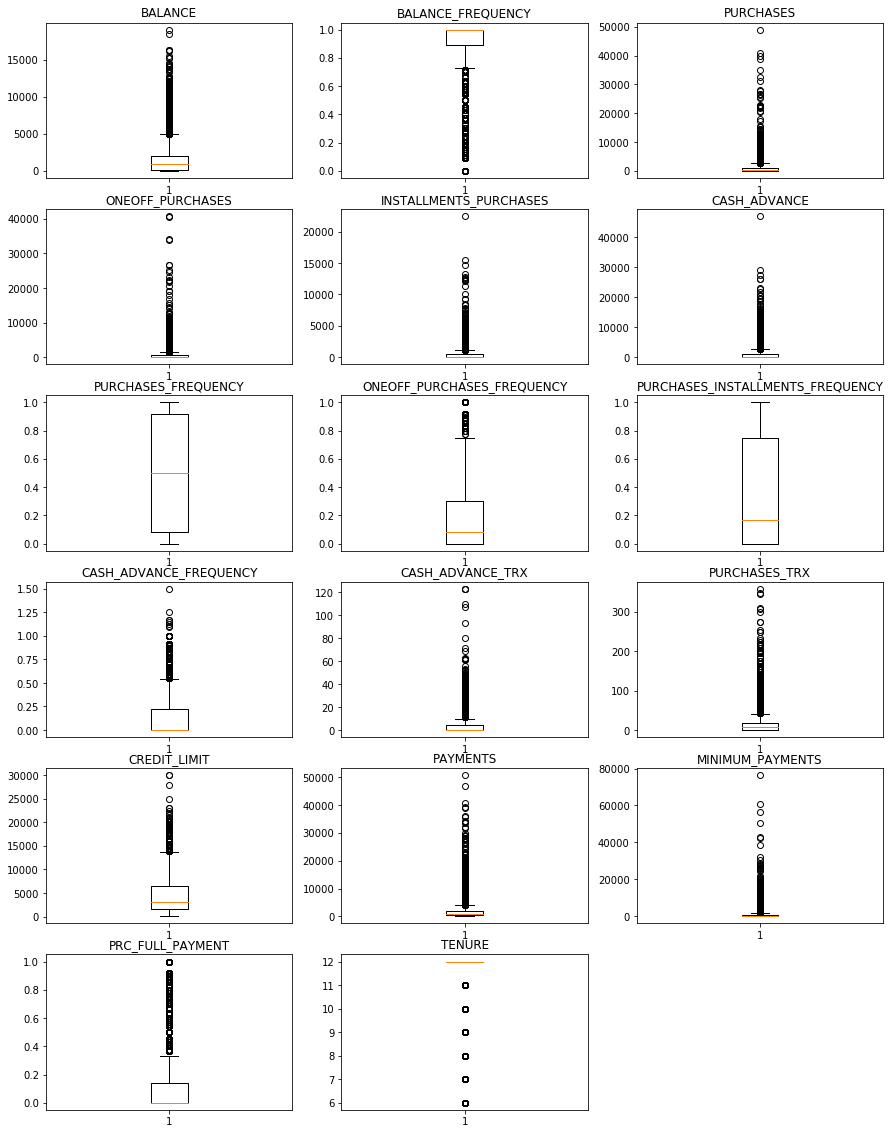

In [36]:
# A LOOK TO OULIERS
plt.figure(figsize=(15,20))
for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(data[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

In [ ]:
#hierarchy of clusters that merge with each other at certain distances

#(the clusters number is unknown).


In [37]:
#Importing our clustering algorithm .

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 9 ,affinity = 'euclidean' ,linkage = 'ward')
clust_labels1 = model.fit_predict(data)
agglomerative =  pd.DataFrame(clust_labels1)
agglomerative =  pd.DataFrame(clust_labels1)
agglomerative


,0
0,1
1,0
2,2
3,2
4,1
...,...
8945,1
8946,1
8947,1
8948,1


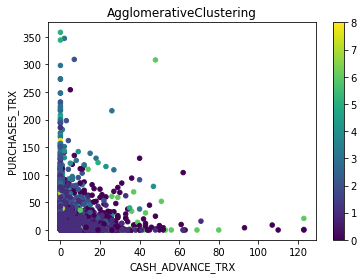

In [38]:

from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
scatter=ax.scatter(data['CASH_ADVANCE_TRX'],data['PURCHASES_TRX'],c = agglomerative[0],s = 20)
ax.set_title('AgglomerativeClustering')
ax.set_xlabel('CASH_ADVANCE_TRX')
ax.set_ylabel('PURCHASES_TRX')
plt.colorbar(scatter)


In [ ]:
#  5 CLUSTERS

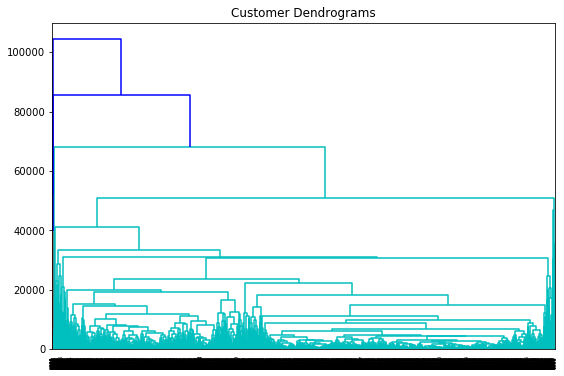

In [91]:
#DENDOGRAM
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(9,6))
plt.title("Customer Dendrograms")

dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [98]:
#kmeans algorithm
#kmeans labels


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7 ,random_state = 0)
kmeans.fit(data)
labels = pd.DataFrame(kmeans.labels_)
labels





,0
0,6
1,3
2,3
3,3
4,6
...,...
8945,6
8946,6
8947,6
8948,6


In [44]:
#K-means Centroids
kmeans.predict(data)

#- Printing the coordinates of cluster centers for chosen K = 4
print(kmeans.cluster_centers_) 
centroids = kmeans.cluster_centers_


[[8.54778042e+02 8.53545314e-01 6.03603854e+02 3.13126474e+02
  2.90778056e+02 4.96026573e+02 4.66919195e-01 1.53799827e-01
  3.51674458e-01 1.07073179e-01 2.25921926e+00 1.06270637e+01
  2.73640920e+03 9.98105819e+02 5.30407640e+02 1.56728504e-01
  1.14300262e+01]
 [3.33482495e+03 9.39982227e-01 1.58394530e+03 9.96887220e+02
  5.87371546e+02 2.11357870e+03 5.42614308e-01 3.21949652e-01
  3.85407865e-01 2.10332359e-01 5.72591944e+00 2.21786340e+01
  9.03769901e+03 2.89167420e+03 1.18785446e+03 1.38539275e-01
  1.17373030e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [4.79253297e+03 9.10564109e-01 1.07865302e+04 7.66993465e+03
  3.11676612e+03 5.17100806e+03 7.50458054e-01 6.02245070e-01
  6.01053744e-01 2.27004240e-01 9.20930233e+00 8.58914729e+01
  1.24771318e+04

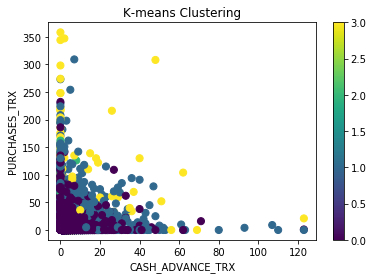

In [45]:
#K-means clusters plotting
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
scatter=ax.scatter(data['CASH_ADVANCE_TRX'],data['PURCHASES_TRX'],c = labels[0],s = 50)
ax.set_title('K-means Clustering')
ax.set_xlabel('CASH_ADVANCE_TRX')
ax.set_ylabel('PURCHASES_TRX')
plt.colorbar(scatter)


In [ ]:
#  5 CLUSTERS

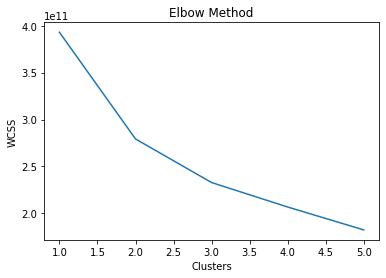

In [97]:
#Plotting Elbow Graph

wcss = []
cluster_list = range(1,6)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init =7, random_state = 20)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()   
    
    

In [ ]:
# BEST K VALUE = 2

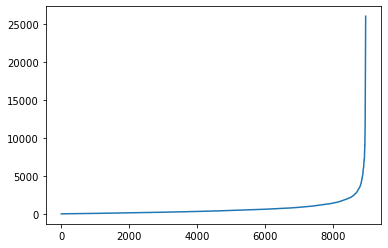

In [81]:
#with knn

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)